# Demand Forecasting

### EDA

In [1]:
%cd ..

d:\ML Projects\Inventory_optimization_and_demand_forecasting


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [3]:
demand_forecasting = "Data\demand_forecasting.csv"
data = pd.read_csv(demand_forecasting)
data.head()

,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments
0,4277,2024-01-03,48,330,24.38,No,Festival,Competitor Pricing,Increasing,Regular
1,5540,2024-04-29,10,334,74.98,Yes,Holiday,Weather,Stable,Premium
2,5406,2024-01-11,67,429,24.83,Yes,Holiday,Economic Indicator,Decreasing,Premium
3,5617,2024-04-04,17,298,13.41,No,NaN,Economic Indicator,Stable,Regular
4,3480,2024-12-14,33,344,94.96,Yes,Festival,Weather,Increasing,Regular


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           10000 non-null  int64  
 1   Date                 10000 non-null  object 
 2   Store ID             10000 non-null  int64  
 3   Sales Quantity       10000 non-null  int64  
 4   Price                10000 non-null  float64
 5   Promotions           10000 non-null  object 
 6   Seasonality Factors  6685 non-null   object 
 7   External Factors     7574 non-null   object 
 8   Demand Trend         10000 non-null  object 
 9   Customer Segments    10000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [5]:
data.isnull().sum()

Product ID                0
Date                      0
Store ID                  0
Sales Quantity            0
Price                     0
Promotions                0
Seasonality Factors    3315
External Factors       2426
Demand Trend              0
Customer Segments         0
dtype: int64

In [6]:
data.describe(include = "all")

,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments
count,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000,6685,7574,10000,10000
unique,NaN,365,NaN,NaN,NaN,2,2,3,3,3
top,NaN,2024-01-05,NaN,NaN,NaN,Yes,Holiday,Weather,Increasing,Budget
freq,NaN,44,NaN,NaN,NaN,5023,3363,2556,3387,3412
mean,5533.521700,NaN,50.264900,248.728900,52.447878,NaN,NaN,NaN,NaN,NaN
std,2568.312468,NaN,28.656333,143.767452,27.459355,NaN,NaN,NaN,NaN,NaN
min,1000.000000,NaN,1.000000,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN
25%,3319.000000,NaN,26.000000,125.000000,28.480000,NaN,NaN,NaN,NaN,NaN
50%,5579.000000,NaN,50.000000,249.000000,52.330000,NaN,NaN,NaN,NaN,NaN
75%,7696.500000,NaN,75.000000,373.000000,76.252500,NaN,NaN,NaN,NaN,NaN


In [7]:
data['Seasonality Factors'] = data['Seasonality Factors'].fillna('None')
data['External Factors'] = data['External Factors'].fillna('None')

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data[['Product ID','Store ID']].duplicated().sum()

np.int64(59)

- product type is something that gets repeated among different stores and potentially has different demands for different stores

In [10]:
unique_entries = data[['Product ID','Store ID','Demand Trend']].drop_duplicates()
print(unique_entries.shape)
print(data.shape)

(9976, 3)
(10000, 10)


In [11]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Frequency distribution of Sales')

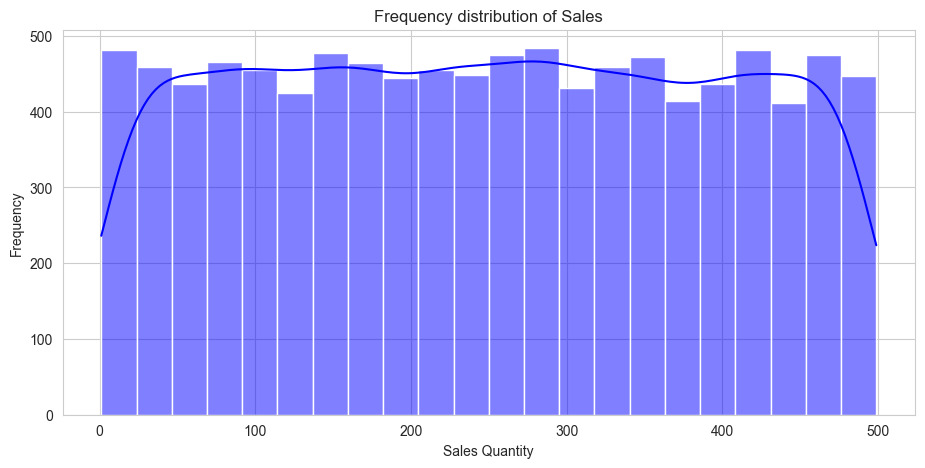

In [12]:
plt.figure(figsize=(11,5))
sns.histplot(data['Sales Quantity'], kde=True, color='blue')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.title('Frequency distribution of Sales')

Text(0.5, 1.0, 'Frequency distribution of Price')

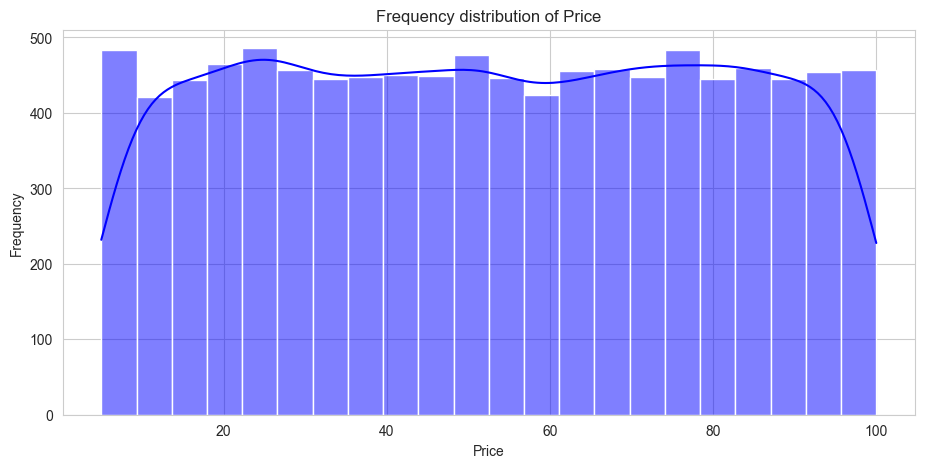

In [13]:
plt.figure(figsize=(11,5))
sns.histplot(data['Price'], kde=True, color='Blue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Frequency distribution of Price')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product ID           10000 non-null  int64         
 1   Date                 10000 non-null  datetime64[ns]
 2   Store ID             10000 non-null  int64         
 3   Sales Quantity       10000 non-null  int64         
 4   Price                10000 non-null  float64       
 5   Promotions           10000 non-null  object        
 6   Seasonality Factors  10000 non-null  object        
 7   External Factors     10000 non-null  object        
 8   Demand Trend         10000 non-null  object        
 9   Customer Segments    10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 781.4+ KB


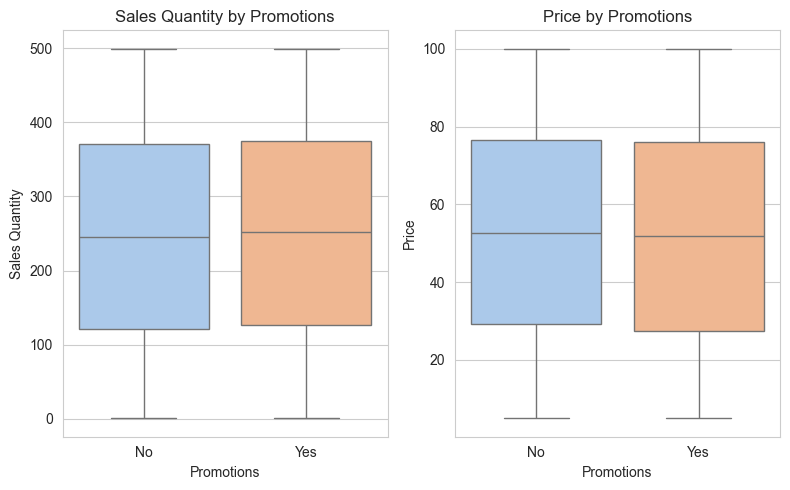

In [15]:
fig, axes = plt.subplots(1,2, figsize=(8,5))
sns.boxplot(x=data['Promotions'], y=data['Sales Quantity'], ax=axes[0], hue=data['Promotions'], palette='pastel')
axes[0].set_title('Sales Quantity by Promotions')
sns.boxplot(x=data['Promotions'], y=data['Price'],ax=axes[1],hue=data['Promotions'], palette='pastel')
axes[1].set_title('Price by Promotions')
plt.tight_layout()

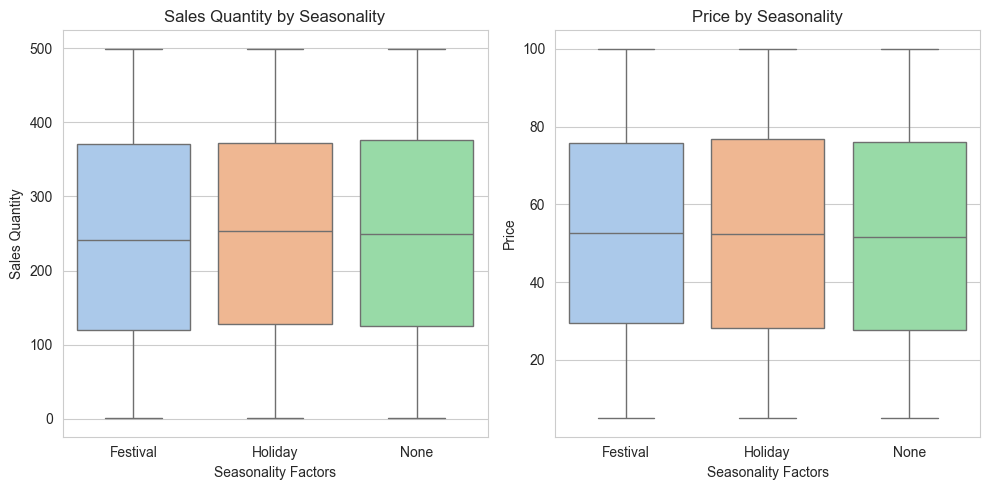

In [16]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(x=data['Seasonality Factors'], y=data['Sales Quantity'], ax=axes[0], hue=data['Seasonality Factors'], palette='pastel')
axes[0].set_title('Sales Quantity by Seasonality')
sns.boxplot(x=data['Seasonality Factors'], y=data['Price'],ax=axes[1],hue=data['Seasonality Factors'], palette='pastel')
axes[1].set_title('Price by Seasonality')
plt.tight_layout()

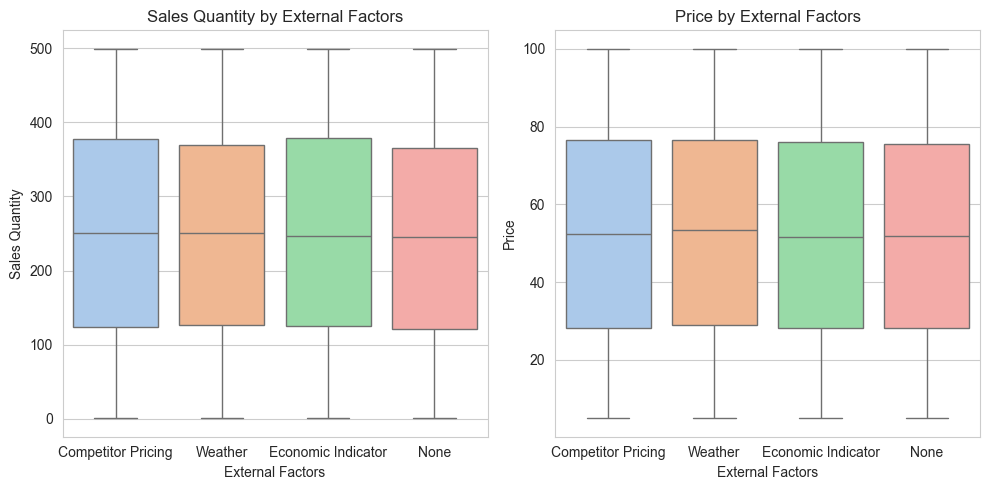

In [17]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(x=data['External Factors'], y=data['Sales Quantity'], ax=axes[0], hue=data['External Factors'], palette='pastel')
axes[0].set_title('Sales Quantity by External Factors')
sns.boxplot(x=data['External Factors'], y=data['Price'],ax=axes[1],hue=data['External Factors'], palette='pastel')
axes[1].set_title('Price by External Factors')
plt.tight_layout()

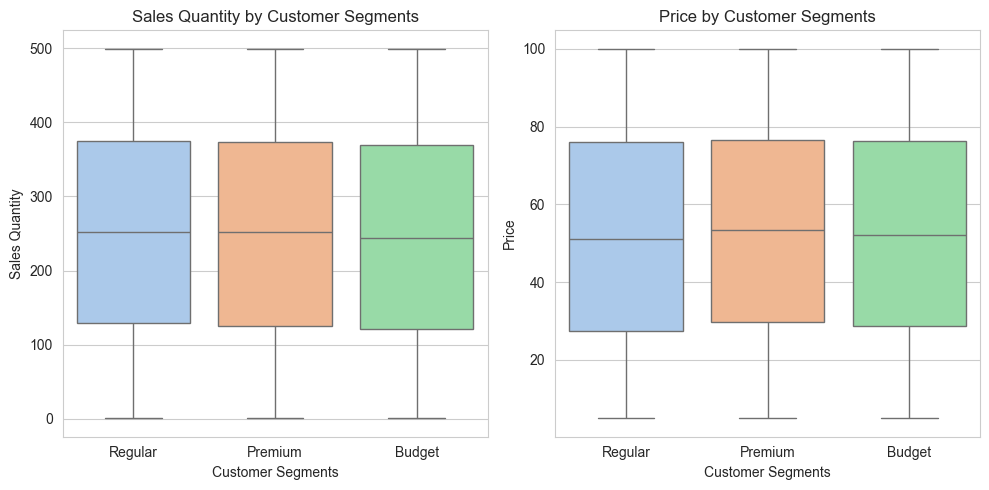

In [18]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(x=data['Customer Segments'], y=data['Sales Quantity'], ax=axes[0], hue=data['Customer Segments'], palette='pastel')
axes[0].set_title('Sales Quantity by Customer Segments')
sns.boxplot(x=data['Customer Segments'], y=data['Price'],ax=axes[1],hue=data['Customer Segments'], palette='pastel')
axes[1].set_title('Price by Customer Segments')
plt.tight_layout()

([], [])

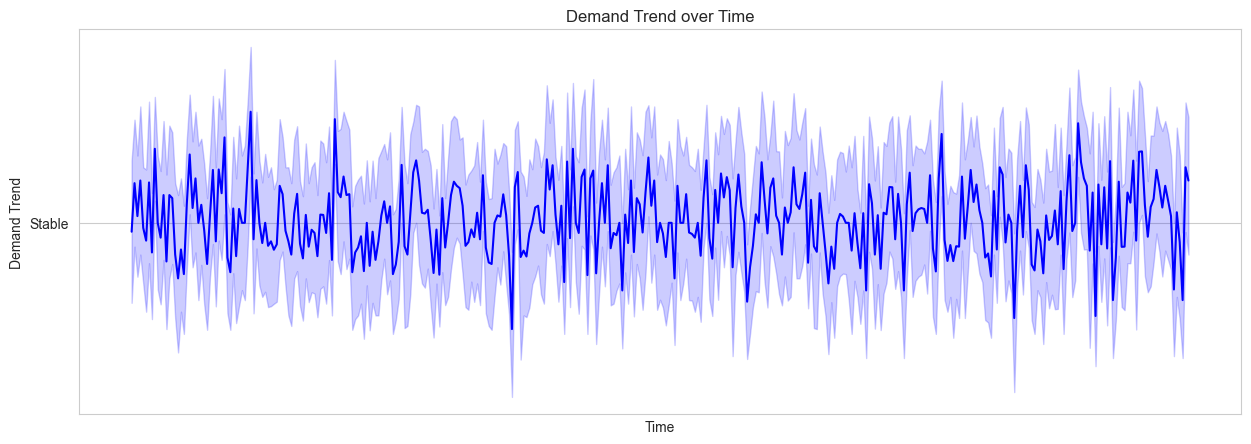

In [19]:
plt.figure(figsize = (15,5))
sns.lineplot(x=data['Date'], y=data['Demand Trend'], color='blue')
plt.xlabel('Time')
plt.ylabel('Demand Trend')
plt.title('Demand Trend over Time')
plt.xticks([])

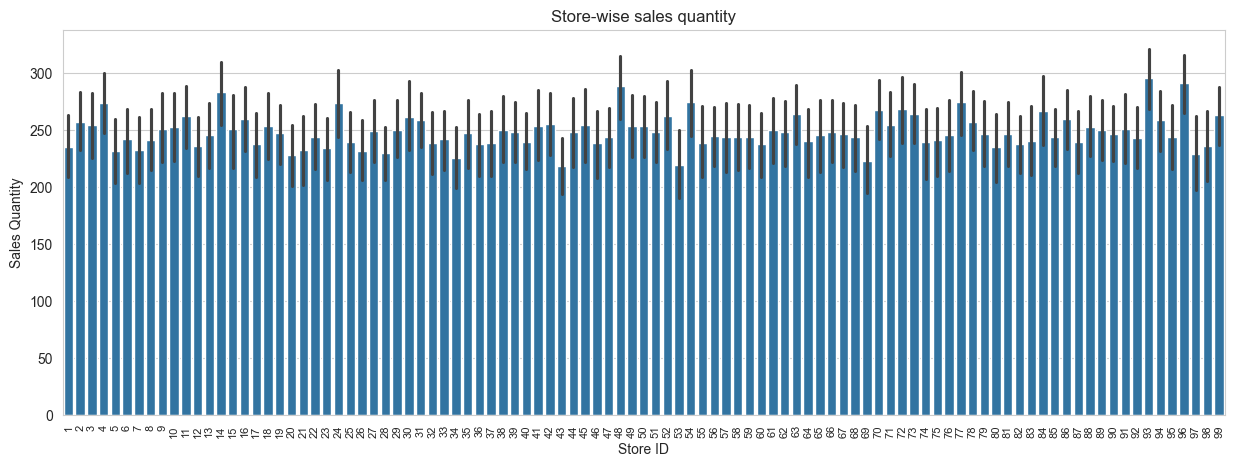

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x=data['Store ID'], y=data['Sales Quantity'])
plt.title("Store-wise sales quantity")
plt.xticks(rotation=90, fontsize=8);

### Data preparation

In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

using standard scaler for scaling thee sales quantity and price variables

In [22]:
scaler = StandardScaler()
data[['Sales Quantity','Price']] = scaler.fit_transform(data[['Sales Quantity','Price']])

using label encoder for encoding the demand trend variable as there is an inherent order and since the values number of unique store and product ids are relatively smaller as compared to the entire dataset

In [23]:
encoder = LabelEncoder()
data['Demand Trend'] = encoder.fit_transform(data['Demand Trend'])
data['Product ID'] = encoder.fit_transform(data['Product ID'])
data['Store ID'] = encoder.fit_transform(data['Store ID'])

one-hot encoding the other categorical variables in the data

In [24]:
cat_cols = data.drop(columns='Demand Trend').select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

getting relevant details from the date column

In [25]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['WeekDay'] = data['Date'].dt.weekday
data['Dayofyear'] = data['Date'].dt.dayofyear

In [26]:
data['Year'].value_counts()

Year
2024    10000
Name: count, dtype: int64

In [27]:
#dropping the yearr column as it only has only one record and is the same for all
data = data.drop(columns=['Year','Date'])
data.head()

,Product ID,Store ID,Sales Quantity,Price,Demand Trend,Promotions_Yes,Seasonality Factors_Holiday,Seasonality Factors_None,External Factors_Economic Indicator,External Factors_None,External Factors_Weather,Customer Segments_Premium,Customer Segments_Regular,Month,Day,WeekDay,Dayofyear
0,2165,47,0.565324,-1.022212,1,False,False,False,False,False,False,False,True,1,3,2,3
1,3026,9,0.593148,0.820604,2,True,True,False,False,False,True,True,False,4,29,0,120
2,2937,66,1.253970,-1.005823,0,True,True,False,True,False,False,True,False,1,11,3,11
3,3077,16,0.342731,-1.421731,2,False,False,True,True,False,False,False,True,4,4,3,95
4,1651,32,0.662708,1.548261,1,True,False,False,False,False,True,False,True,12,14,5,349


### MODELLING

In [28]:
X = data.drop(columns='Sales Quantity')
y = data['Sales Quantity']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=13)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "SVR" : SVR(),
    "KN Regressor" : KNeighborsRegressor()
}

In [32]:
results = {}

In [33]:
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = { "MAE" : mae, "RMSE" : rmse, "R2" : r2}
    print(f' {name} model completed')

 Linear Regression model completed
 Decision Tree Regressor model completed
 Random Forest Regressor model completed
 Gradient Boosting Regressor model completed
 AdaBoost Regressor model completed
 SVR model completed
 KN Regressor model completed


  File "d:\ML Projects\Inventory_optimization_and_demand_forecasting\sales\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\Python 3.12\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Python 3.12\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\Python 3.12\Lib\subprocess.py", line 1540, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [34]:
metrics = pd.DataFrame(results).T # transpose the data 
metrics

,MAE,RMSE,R2
Linear Regression,0.864700,1.003053,-0.003298
Decision Tree Regressor,1.198493,1.453872,-1.107824
Random Forest Regressor,0.875849,1.021254,-0.040039
Gradient Boosting Regressor,0.868120,1.007606,-0.012426
AdaBoost Regressor,0.864562,1.002498,-0.002187
SVR,0.864137,1.002268,-0.001728
KN Regressor,0.909589,1.089136,-0.182894


In [35]:
from sklearn.model_selection import GridSearchCV
model = AdaBoostRegressor()

params = {
    'n_estimators' : [25,50,100,200,400],
    'learning_rate' : [1,0.01,0.001,0.0001],
    'loss' : ['linear','square','exponential']
    }

grid_search = GridSearchCV(estimator=model, param_grid= params, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.01, 0.001, 0.0001],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [25, 50, 100, 200, 400]},
             scoring='neg_mean_absolute_error', verbose=1)

In [36]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)

In [37]:
print(mae)

0.8635657217172111
